# Descriptive Statistics 

In [1]:
import pandas as pd
import textwrap
import numpy as np
from scipy.stats import pearsonr
import math  
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/z_df_ready_for_analysis.csv")
df

,title,author,fmc_name,year,author_gender,master_genre,Q4.answer,Q4.explanation,Q5.answer,Q5.explanation,...,Q28.answer,Q28.explanation,Q29.answer,Q29.explanation,prop_pos,prop_neg,diff_prop,z_prop_pos,z_prop_neg,z_diff_prop
0,Wildflower Hill,"Freeman, Kimberley",Beattie Blaxland,2010,1,Historical Fiction,0.0,There is no indication that Beattie is saved b...,0.0,There is no mention of Beattie saving a male c...,...,0.0,Beattie does not have a lower rank occupation;...,1.0,Beattie has a higher rank occupation as a farm...,0.307692,0.615385,-0.307692,-0.166028,0.456414,-0.622442
1,Oracle Night,"Auster, Paul",Grace,2003,0,Literary Fiction,0.0,No evidence of Grace being saved by a male cha...,0.0,Grace does not save any male character.,...,0.0,Art director role is mid/high-ranking[7].,1.0,Holds a managerial position in publishing[7].,0.333333,0.375000,-0.041667,-0.035420,-0.504159,0.468739
2,Pollyanna Pollyanna 1,"Porter, Eleanor H.",Pollyanna Whittier,1913,1,Children,0.0,There is no instance where Pollyanna is saved ...,1.0,Pollyanna helps Mr. Pendleton by summoning Dr....,...,0.0,Pollyanna does not have a lower rank occupation.,0.0,Pollyanna does not have a higher rank occupation.,0.384615,0.230769,0.153846,0.225796,-1.080503,1.306298
3,Eleanor Rigby,"Coupland, Douglas",Liz Dunn,2004,0,Literary Fiction,0.0,Jeremy's arrival disrupts Liz's isolation but ...,1.0,Liz becomes Jeremy's primary caregiver during ...,...,NaN,Specific occupation rank unclear.,NaN,No managerial/professional role described.,0.416667,0.444444,-0.027778,0.389056,-0.226660,0.615716
4,Journal 64 Department Q 4,"Adler-Olsen, Jussi",Nete Rosen,2010,0,Mystery,0.0,There is no indication that Nete Rosen is save...,0.0,There is no indication that Nete Rosen saves a...,...,0.0,There is no indication that Nete Rosen has a l...,0.0,There is no indication that Nete Rosen has a h...,0.076923,0.461538,-0.384615,-1.341500,-0.158353,-1.183148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13864,The Woman He Loved Before,"Koomson, Dorothy",Libby Britcham,2013,1,Romance,0.0,There is no indication that Libby is saved by ...,0.0,There is no information suggesting Libby saves...,...,NaN,There is no information about Libby having a l...,NaN,There is no information about Libby having a h...,0.500000,0.444444,0.055556,0.813532,-0.226660,1.040192
13865,Earthquake Terror Puffin Novel,"Kehret, Peg",Abby,1996,1,Other,1.0,Abby is rescued after Jonathan provides direct...,0.0,There is no indication that Abby saves a male ...,...,0.0,There is no indication that Abby holds a lower...,0.0,There is no indication that Abby holds a highe...,0.454545,0.384615,0.069930,0.582000,-0.465736,1.047736
13866,Truly Madly Deeply,"Kazi, Faraaz",Seema,2010,0,Romance,0.0,There is no indication that Seema is saved by ...,0.0,There is no mention of Seema saving a male cha...,...,0.0,Seema does not have a lower rank occupation.,0.0,Seema does not have a higher rank occupation.,0.125000,0.250000,-0.125000,-1.096610,-1.003657,-0.092954
13867,The American Heiress,"Goodwin, Daisy",Cora Cash,2010,1,Historical Fiction,1.0,Cora is saved by the Duke of Wareham after she...,0.0,There is no indication that Cora saves a male ...,...,0.0,Cora does not have a lower rank occupation.,0.0,Cora does not have a higher rank occupation in...,0.846154,0.076923,0.769231,2.576741,-1.695269,4.272010


## Author Gender and Genre

In [3]:
# How many (fe)male authors?
print(df['author_gender'].value_counts())

author_gender
1    9665
0    4204
Name: count, dtype: int64


In [4]:
# How many books in what genres? 
print(df['master_genre'].value_counts())

master_genre
Romance               3105
Fantasy               2162
Literary Fiction      1407
Historical Fiction    1406
Mystery               1300
Other                 1165
YA                    1038
Thriller               931
Science Fiction        708
Horror                 342
Children               305
Name: count, dtype: int64


In [8]:
# Crosstable authors/genre 
ct = pd.crosstab(df['master_genre'], df['author_gender'])

#conduct significance test for each gender distribution (ie within each genre) from 50:50 distribution
from scipy.stats import chisquare
for genre in df['master_genre'].unique():   
    observed = ct.loc[genre]
    expected = [len(df[df['master_genre'] == genre]) / 2, len(df[df['master_genre'] == genre]) / 2]
    chi2, p = chisquare(observed, f_exp=expected)
    print(f"Genre: {genre}, Male: {observed[0]}, Female: {observed[1]}, p-value: {p}")


Genre: Historical Fiction, Male: 427, Female: 979, p-value: 4.704672713865173e-49
Genre: Literary Fiction, Male: 665, Female: 742, p-value: 0.04009333724117868
Genre: Children, Male: 54, Female: 251, p-value: 1.6439580246392503e-29
Genre: Mystery, Male: 413, Female: 887, p-value: 1.7848401564331315e-39
Genre: YA, Male: 165, Female: 873, p-value: 4.963878963484552e-107
Genre: Other, Male: 377, Female: 788, p-value: 2.1513526019738175e-33
Genre: Romance, Male: 213, Female: 2892, p-value: 0.0
Genre: Science Fiction, Male: 384, Female: 324, p-value: 0.024137215419960695
Genre: Fantasy, Male: 707, Female: 1455, p-value: 3.1496881132299336e-58
Genre: Thriller, Male: 578, Female: 353, p-value: 1.6548732782834297e-13
Genre: Horror, Male: 221, Female: 121, p-value: 6.395311158899042e-08


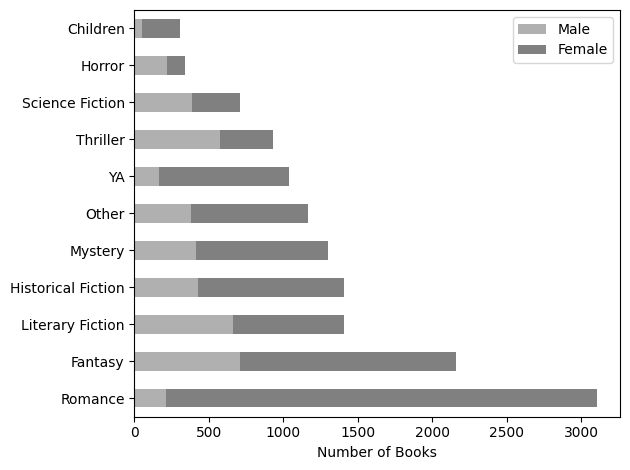

In [9]:
#rename columns to male and female
ct.columns = ['Male', 'Female']

# Add a 'Total' column and sort by it
ct['Total'] = ct['Male'] + ct['Female']
ct_sorted = ct.sort_values('Total', ascending=False)

#define gray colors for the plot
gray_colors = ['#B0B0B0', '#808080']  # Light

# Plot sorted data
ct_sorted[['Male', 'Female']].plot(kind='barh', stacked=True, color=gray_colors)
plt.xlabel('Number of Books')
plt.ylabel('')
plt.legend()
plt.tight_layout()
plt.savefig('../visualizations/Figure 1.png', dpi=300)
plt.show()


In [23]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Pastel colors
# pastel_colors = sns.color_palette('pastel')
# pastel_blue = pastel_colors[0]    # Male
# pastel_orange = pastel_colors[1]  # Female

# # Crosstab
# ct = pd.crosstab(df['master_genre'], df['author_gender'])
# ct.columns = ['Male', 'Female']
# ct['Total'] = ct['Male'] + ct['Female']

# # Percentages
# ct['Female_pct'] = ct['Female'] / ct['Total'] * 100
# ct['Male_pct'] = ct['Male'] / ct['Total'] * 100

# # Sort by total
# ct_sorted = ct.sort_values('Total', ascending=False)

# # Significance info
# significance_data = pd.DataFrame({
#     'Genre': ['Romance', 'Thriller', 'Horror', 'Science Fiction', 'YA',
#               'Literary Fiction', 'Fantasy', 'Mystery', 'Children', 'Other', 'Historical Fiction'],
#     'p-value': [7.187434e-225, 2.208660e-125, 4.757935e-50, 1.008323e-45, 1.183951e-18,
#                 3.358027e-16, 1.849512e-04, 4.833278e-03, 4.654181e-02, 7.974452e-02, 2.428984e-01],
#     'Significant': [True]*9 + [False]*2
# })

# # Add significance info to the sorted crosstab
# ct_sorted = ct_sorted.reset_index().merge(significance_data, left_on='master_genre', right_on='Genre', how='left')

# # Plot
# fig, ax = plt.subplots(figsize=(10, 6))

# # Bars
# bars_female = ax.bar(ct_sorted['master_genre'], ct_sorted['Female'], label='Female', color=pastel_orange)
# bars_male = ax.bar(ct_sorted['master_genre'], ct_sorted['Male'], bottom=ct_sorted['Female'], label='Male', color=pastel_blue)

# # Add stars for significant differences
# for i, row in ct_sorted.iterrows():
#     if row['Significant']:
#         # Choose number of stars
#         if row['p-value'] < 0.001:
#             stars = '***'
#         elif row['p-value'] < 0.01:
#             stars = '**'
#         else:
#             stars = '*'

#         # Add stars closer to the top of the bars
#         total_height = row['Female'] + row['Male']
#         ax.text(i, total_height + 5, stars, ha='center', va='bottom', fontsize=14, color='black')

# # Axis and legend settings
# ax.set_xticks(range(len(ct_sorted['master_genre'])))
# ax.set_xticklabels(ct_sorted['master_genre'], rotation=45, ha='right')
# ax.set_ylabel('Number of Books')
# ax.set_title('Books per Genre by Author Gender')
# ax.legend(title='Author Gender')

# plt.tight_layout()
# plt.show()


# Stereotypicality descriptives 
## Amounts of NA per Item

notable item descriptives (histogram of NA, 0, 1 → e.g. which ones are almost always answered with yes/no/NA?)

- high amount of 0: Q11, Q14, Q24, Q28
  - Q11: Is the female character a perpetrator or does she harm a male character? (0 = no, 1 = yes, 99 = no information) 
  - Q14: Is the female character physically weak/incapable? (0 = no, 1 = yes, 99 = no information) 
  - Q24: Is the female character a homemaker? (0 = no, 1 = yes, 99 = no information)  
  - Q28: Does the female character have a lower rank occupation (e.g., nurse, assistant, maid, …)? (0 = no, 1 = yes, 99 = no information)
  
- high amount of 1: Q9, Q17, Q23
  - Q9: Does the female character solve her own problem through skill? (0 = no, 1 = yes, 99 = no information) 
  - Q17: Is the female character brave/likes taking risks/challenges? (0 = no, 1 = yes, 99 = no information) 
  - 23: Does the female character maintain personal goals and boundaries, even when others express emotional needs or expectations? (0 = no, 1 = yes, 99 = no information) 

- high(er) amount of NAs: Q5, Q7, Q8, Q12, Q20, Q26
  - Q5: Does the female character save a male character? (0 = no, 1 = yes, 99 = no information) 
  - Q7: Does the female character protect a male character? (0 = no, 1 = yes, 99 = no information) 
  - Q8: Is the female character’s problem solved through help or luck? (0 = no, 1 = yes, 99 = no information) 
  - Q12: Does the female character follow orders? (0 = no, 1 = yes, 99 = no information) 
  - Q20: Is the female character emotionally aware and attuned to others' needs, moods, or the dynamics between people, and tries to maintain harmony? (0 = no, 1 = yes, 99 = no information) 
  - Q26: Is the female character admired for her beauty? (0 = no, 1 = yes, 99 = no information) 

In [24]:
item_labels = {
    'Q4.answer':  '1: Is the female character saved by a male character?',
    'Q5.answer':  '1: Does the female character save a male character?',
    'Q6.answer':  '2: Is the female character protected by a male character?',
    'Q7.answer':  '2: Does the female character protect a male character?',
    'Q8.answer':  '3: Is the female character’s problem solved through help or luck?',
    'Q9.answer':  '3: Does the female character solve her own problem through skill?',
    'Q10.answer': '4: Is the female character victimized/harmed by a male character?',
    'Q11.answer': '4: Is the female character a perpetrator or does she harm a male character?',
    'Q12.answer': '5: Does the female character follow orders?',
    'Q13.answer': '5: Does the female character give orders?',
    'Q14.answer': '6: Is the female character physically weak/incapable?',
    'Q15.answer': '6: Is the female character physically strong/capable?',
    'Q16.answer': '7: Is the female character fearful/scared of taking risks/challenges?',
    'Q17.answer': '7: Is the female character brave/likes taking risks/challenges?',
    'Q18.answer': '8: Does the female character care for others (e.g., nurses someone, comforts someone, takes care of children or sick)?',
    'Q19.answer': '8: Does the female character not engage in caregiving behaviors (e.g., focuses on tasks or goals without providing emotional or physical support to others)?',
    'Q20.answer': '9: Is the female character emotionally aware and attuned to others\' needs, moods, or the dynamics between people, and tries to maintain harmony?',
    'Q21.answer': '9: Does the female character focus more on practical matters or impersonal concerns than others’ emotions or social dynamics?',
    'Q22.answer': '10: Does the female character sacrifice her own goals, desires, or needs to prioritize someone else’s wellbeing or to avoid conflict?',
    'Q23.answer': '10: Does the female character maintain personal goals and boundaries, even when others express emotional needs or expectations?',
    'Q24.answer': '11: Is the female character a homemaker?',
    'Q25.answer': '11: Is the female character a breadwinner?',
    'Q26.answer': '12: Is the female character admired for her beauty?',
    'Q27.answer': '12: Is the female character admired for her intelligence?',
    'Q28.answer': '13: Does the female character have a lower rank occupation (e.g., nurse, assistant, maid)?',
    'Q29.answer': '13: Does the female character have a higher rank occupation (e.g., doctor, manager, ruler)?'
}

In [ ]:
items = list(item_labels.keys())

# 2. Alle 99er-Werte durch NaN ersetzen
df2 = df.copy()
df2.replace(99, np.nan, inplace=True)

# 3. Maximalen Count über alle Items ermitteln
max_count = 0
for col in items:
    counts = df2[col].value_counts(dropna=False)
    max_count = max(max_count, counts.max())

# 4. Farben definieren
colors = ['#FFB3BA', '#FFDFBA', '#8FD9A8']  # Pastellfarben 💕

# 5. Anzahl Spalten und Reihen
n_cols = 2
n_rows = math.ceil(len(items) / n_cols)  # automatisch berechnet 💡

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5), sharey=True)
fig.subplots_adjust(hspace=1.2)

wrap_width = 40

# Falls nur eine Zeile: axes in 2D-Array umwandeln
if n_rows == 1:
    axes = np.expand_dims(axes, axis=0)

for idx, col in enumerate(items):
    row = idx // n_cols
    col_idx = idx % n_cols
    ax = axes[row, col_idx]
    
    counts = df2[col].value_counts(dropna=False)
    category_values = [0, 1, np.nan]
    category_counts = [counts.get(val, 0) for val in category_values]
    labels = ['No', 'Yes', 'NA']
    
    original_text = item_labels[col]
    wrapped_text = "\n".join(textwrap.wrap(original_text, width=wrap_width))
    
    ax.bar(labels, category_counts, color=colors)
    ax.set_title(wrapped_text, fontsize=9, pad=12)
    ax.set_ylim(0, max_count * 1.1)
    ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=8)
    if col_idx == 0:
        ax.set_ylabel('Count')

# Leere Plots deaktivieren 🧼
for empty_idx in range(len(items), n_rows * n_cols):
    r = empty_idx // n_cols
    c = empty_idx % n_cols
    axes[r, c].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Correlation of pro- and anti-stereotypicality items

In [27]:
# Drop missing values pairwise
valid = df[['z_prop_pos', 'z_prop_neg']].dropna()

# Compute Pearson correlation and p-value
r, p = pearsonr(valid['z_prop_pos'], valid['z_prop_neg'])

print(f"Pearson correlation: r = {r:.3f}, p = {p:.4f}")


Pearson correlation: r = -0.332, p = 0.0000


## Heatmaps

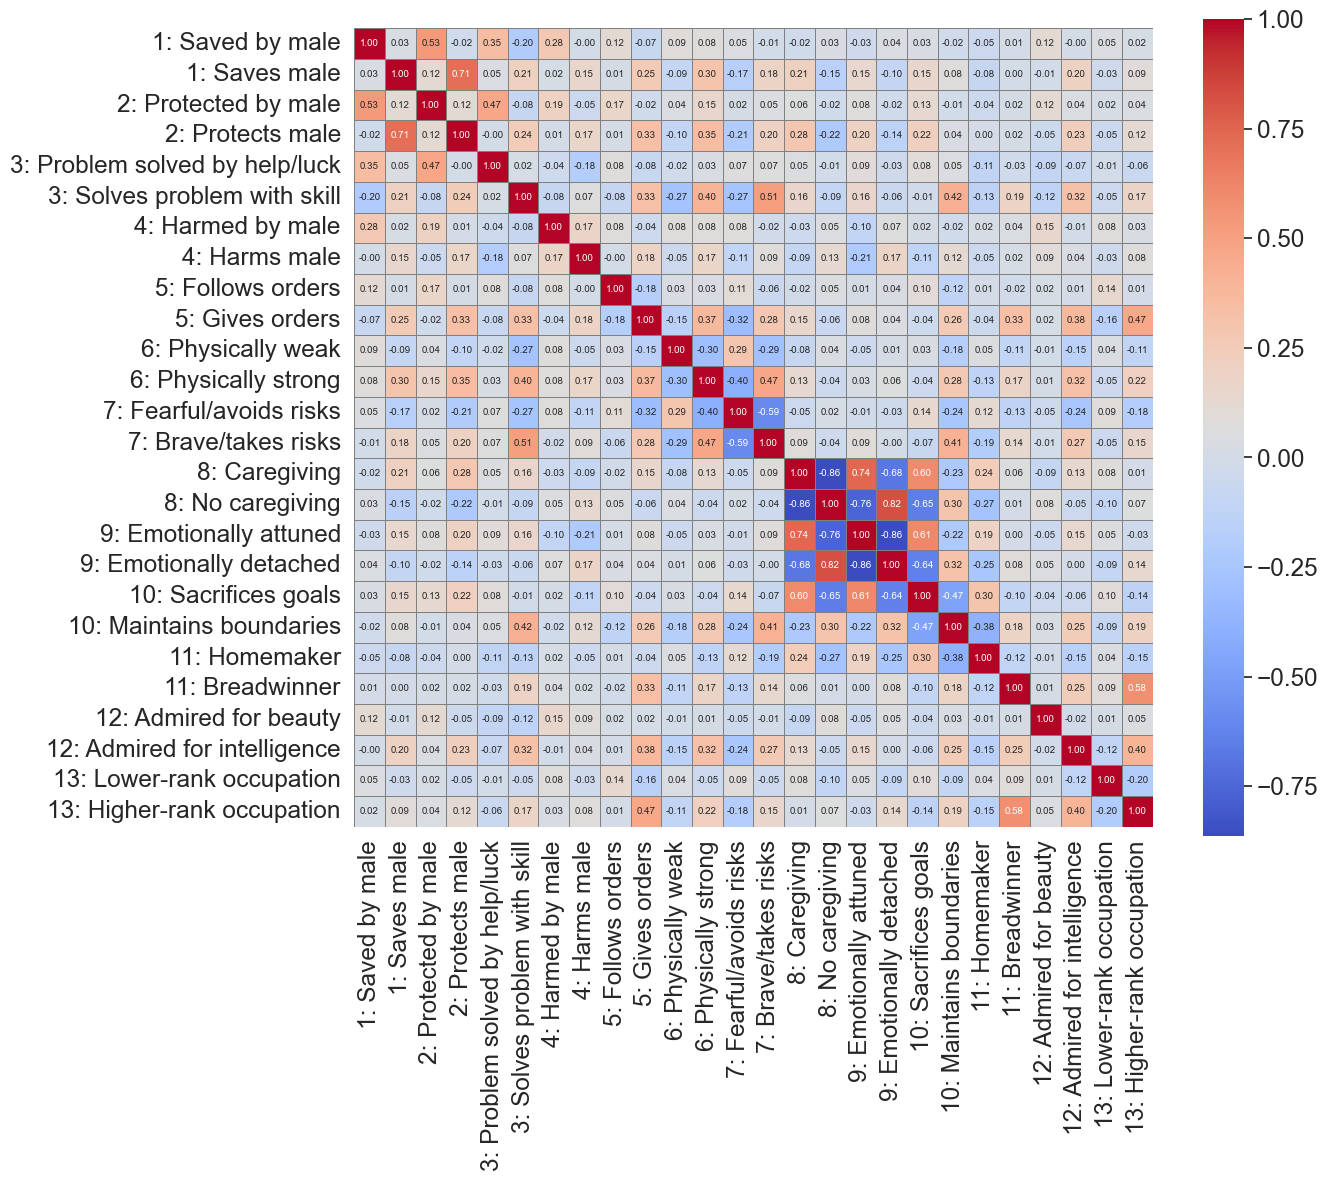

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select binary item columns
items = df[['Q4.answer', 'Q5.answer', 'Q6.answer', 'Q7.answer', 'Q8.answer', 'Q9.answer',
        'Q10.answer', 'Q11.answer', 'Q12.answer', 'Q13.answer', 'Q14.answer', 'Q15.answer',
        'Q16.answer', 'Q17.answer', 'Q18.answer', 'Q19.answer', 'Q20.answer', 'Q21.answer',
        'Q22.answer', 'Q23.answer', 'Q24.answer', 'Q25.answer', 'Q26.answer', 'Q27.answer',
        'Q28.answer', 'Q29.answer']]

# Item label mapping
item_labels = {
    'Q4.answer':  '1: Saved by male',
    'Q5.answer':  '1: Saves male',
    'Q6.answer':  '2: Protected by male',
    'Q7.answer':  '2: Protects male',
    'Q8.answer':  '3: Problem solved by help/luck',
    'Q9.answer':  '3: Solves problem with skill',
    'Q10.answer': '4: Harmed by male',
    'Q11.answer': '4: Harms male',
    'Q12.answer': '5: Follows orders',
    'Q13.answer': '5: Gives orders',
    'Q14.answer': '6: Physically weak',
    'Q15.answer': '6: Physically strong',
    'Q16.answer': '7: Fearful/avoids risks',
    'Q17.answer': '7: Brave/takes risks',
    'Q18.answer': '8: Caregiving',
    'Q19.answer': '8: No caregiving',
    'Q20.answer': '9: Emotionally attuned',
    'Q21.answer': '9: Emotionally detached',
    'Q22.answer': '10: Sacrifices goals',
    'Q23.answer': '10: Maintains boundaries',
    'Q24.answer': '11: Homemaker',
    'Q25.answer': '11: Breadwinner',
    'Q26.answer': '12: Admired for beauty',
    'Q27.answer': '12: Admired for intelligence',
    'Q28.answer': '13: Lower-rank occupation',
    'Q29.answer': '13: Higher-rank occupation'
}

# Rename columns with friendly labels
items_renamed = items.rename(columns=item_labels)

# Compute the correlation matrix
cor_matrix = items_renamed.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
#increase font size of ticks
plt.rcParams.update({'font.size': 12})  # Increase font size globally
sns.set(font_scale=1.6)  # Increase font size for annotations

sns.heatmap(cor_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True,
            square=True, linewidths=0.5, linecolor='gray',
            annot_kws={"size": 7})  
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('../visualizations/Figure 2.png', dpi=300)

plt.show()

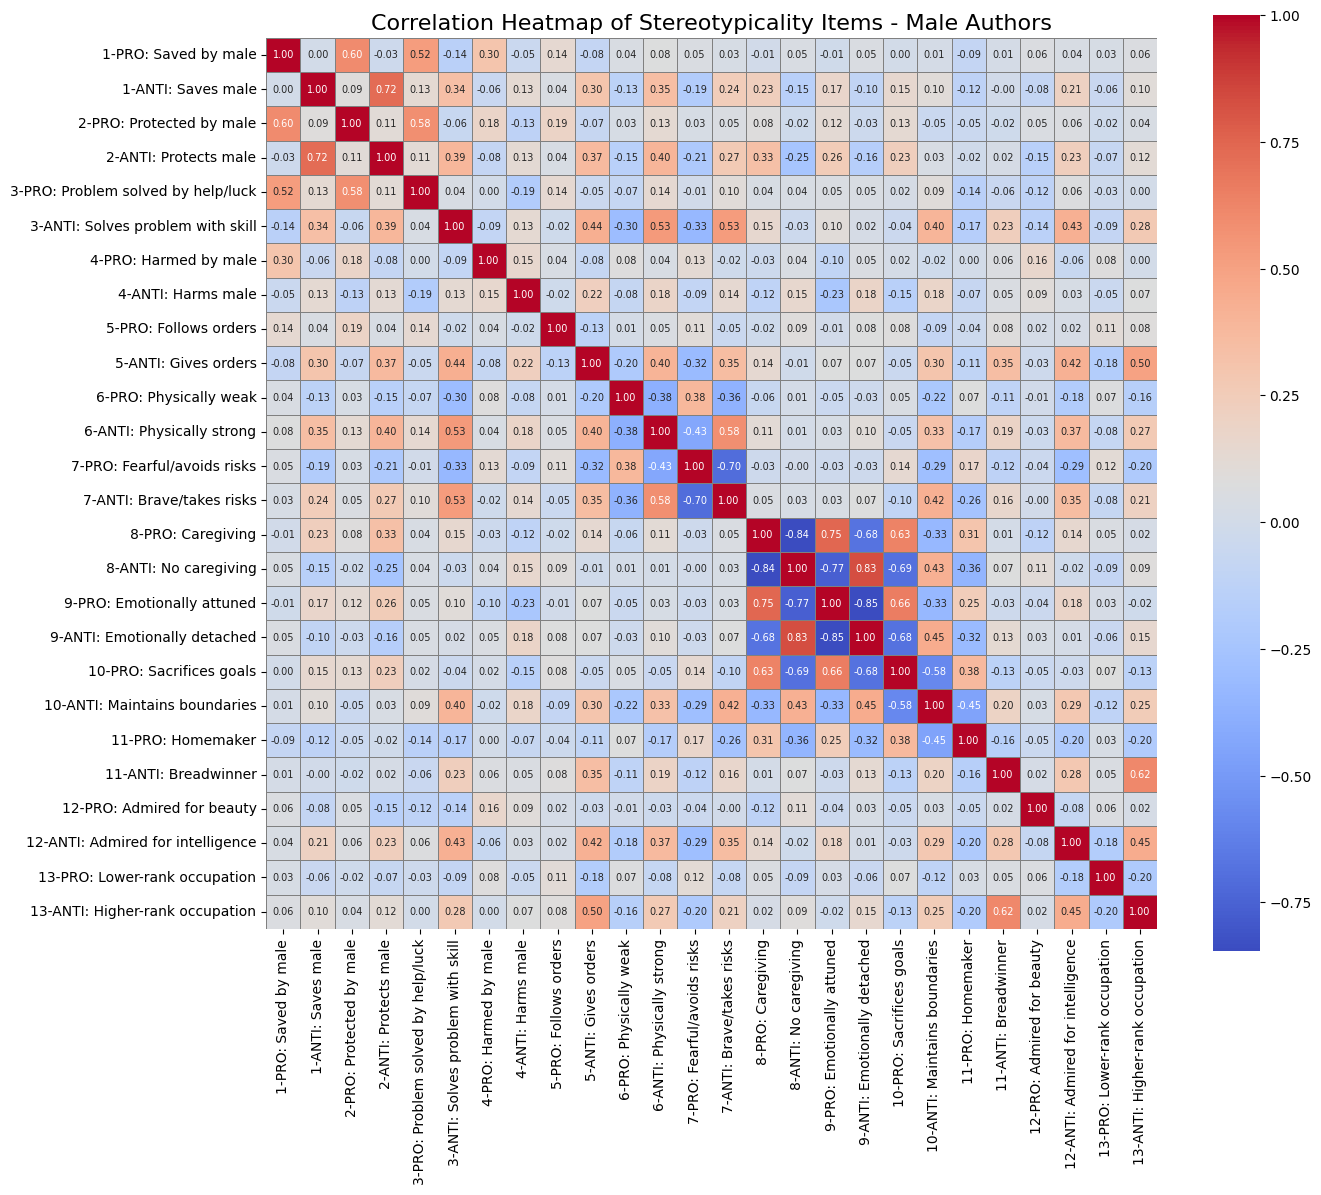

In [14]:
# Select binary item columns
df_male = df[df['author_gender'] == 0].copy()

items = df_male[['Q4.answer', 'Q5.answer', 'Q6.answer', 'Q7.answer', 'Q8.answer', 'Q9.answer',
        'Q10.answer', 'Q11.answer', 'Q12.answer', 'Q13.answer', 'Q14.answer', 'Q15.answer',
        'Q16.answer', 'Q17.answer', 'Q18.answer', 'Q19.answer', 'Q20.answer', 'Q21.answer',
        'Q22.answer', 'Q23.answer', 'Q24.answer', 'Q25.answer', 'Q26.answer', 'Q27.answer',
        'Q28.answer', 'Q29.answer']]

# Rename columns with friendly labels
items_renamed = items.rename(columns=item_labels)

# Compute the correlation matrix
cor_matrix = items_renamed.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(cor_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True,
            square=True, linewidths=0.5, linecolor='gray',
            annot_kws={"size": 7})  
plt.title('Correlation Heatmap of Stereotypicality Items - Male Authors', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

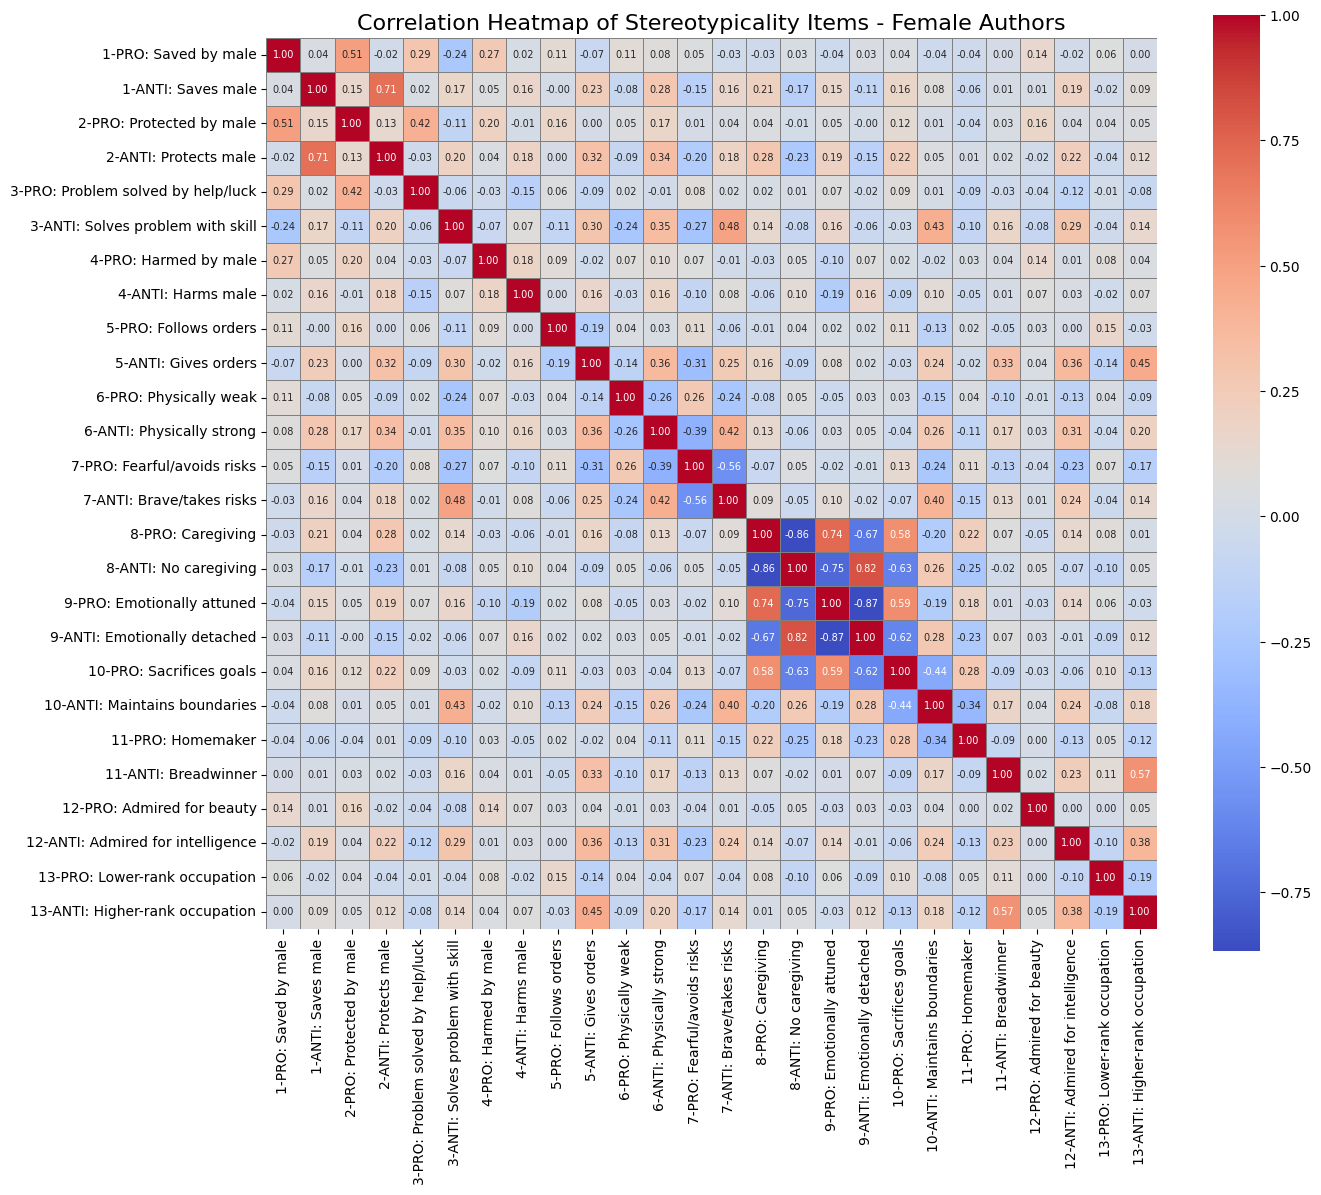

In [15]:
# Select binary item columns
df_female = df[df['author_gender'] == 1].copy()

items = df_female[['Q4.answer', 'Q5.answer', 'Q6.answer', 'Q7.answer', 'Q8.answer', 'Q9.answer',
        'Q10.answer', 'Q11.answer', 'Q12.answer', 'Q13.answer', 'Q14.answer', 'Q15.answer',
        'Q16.answer', 'Q17.answer', 'Q18.answer', 'Q19.answer', 'Q20.answer', 'Q21.answer',
        'Q22.answer', 'Q23.answer', 'Q24.answer', 'Q25.answer', 'Q26.answer', 'Q27.answer',
        'Q28.answer', 'Q29.answer']]

# Rename columns with friendly labels
items_renamed = items.rename(columns=item_labels)

# Compute the correlation matrix
cor_matrix = items_renamed.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(cor_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True,
            square=True, linewidths=0.5, linecolor='gray',
            annot_kws={"size": 7})  
plt.title('Correlation Heatmap of Stereotypicality Items - Female Authors', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Competence Agency
Romance, historical fiction
fantasy, science fiction

# Stereotypicality Trends Across the Years

   year     Variable     Value
0  2010  z_diff_prop -0.622442
1  2003  z_diff_prop  0.468739
2  1913  z_diff_prop  1.306298
3  2004  z_diff_prop  0.615716
4  2010  z_diff_prop -1.183148
(41607, 3)


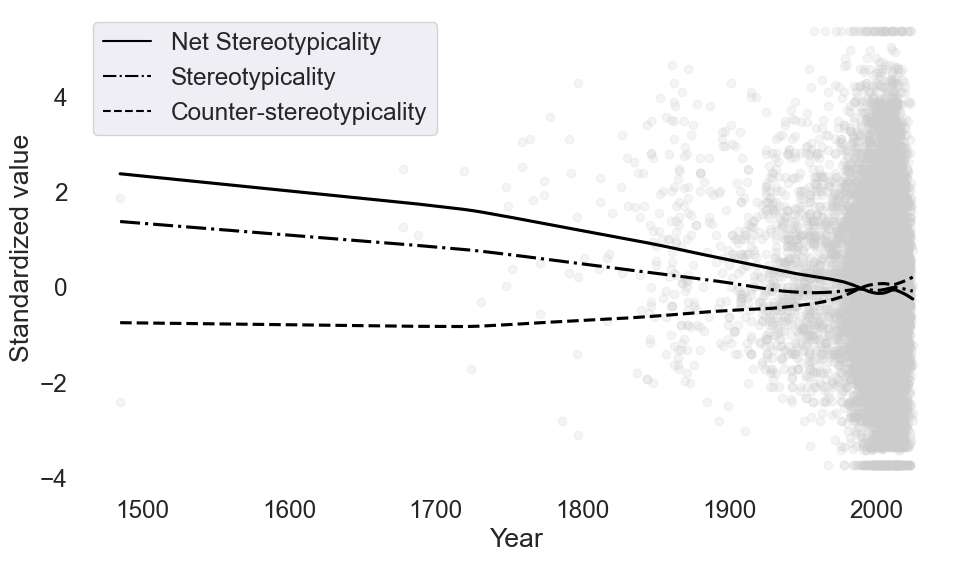

In [65]:
# First, reshape to long format
df_long = df.melt(id_vars='year', value_vars=['z_diff_prop', 'z_prop_pos', 'z_prop_neg'],
                          var_name='Variable', value_name='Value')
print(df_long.head())
print(df_long.shape)

# Map old variable names to nice labels
label_map = {
    'z_prop_pos': 'Pro-Stereotypicality',
    'z_prop_neg': 'Anti-Stereotypicality',
    'z_diff_prop': 'Net Stereotypicality'
}
df_long['Variable'] = df_long['Variable'].map(label_map)

# Plot smoothed relationship using grayscale palette
plt.figure(figsize=(10, 6), facecolor='white')
plt.gca().set_facecolor('white')
gray_palette = ['#222222', '#888888', '#CCCCCC']

# Net Stereotypicality: scatter points (light gray) and solid black line
sns.regplot(
    data=df_long[df_long['Variable'] == 'Net Stereotypicality'],
    x='year', y='Value', scatter=True, color='#CCCCCC',
    lowess=True, line_kws={'color': 'black', 'linestyle': '-'}, scatter_kws={'alpha': 0.2}
)
# Pro-Stereotypicality: solid black line, no scatter
sns.regplot(
    data=df_long[df_long['Variable'] == 'Pro-Stereotypicality'],
    x='year', y='Value', scatter=False, color='black', 
    lowess=True, line_kws={'color': 'black', 'linestyle': '-.'}
)
# Anti-Stereotypicality: dashed black line, no scatter
sns.regplot(
    data=df_long[df_long['Variable'] == 'Anti-Stereotypicality'],
    x='year', y='Value', scatter=False, color='black', 
    lowess=True, line_kws={'color': 'black', 'linestyle': '--'}
)

# Create custom legend with proper line styles
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='black', linestyle='-', label='Net Stereotypicality'),
    Line2D([0], [0], color='black', linestyle='-.', label='Stereotypicality'),
    Line2D([0], [0], color='black', linestyle='--', label='Counter-stereotypicality')
]
plt.legend(handles=legend_elements, loc='upper left')


plt.xlabel('Year')
plt.ylabel('Standardized value')
plt.grid(True)
plt.tight_layout()
plt.savefig('../visualizations/Figure 5.png', dpi=300)
plt.show()

In [36]:
# How many books influence the steep downwards trend after 2022?
print((df['year'] > 2020).sum()) # not that many, keep uncertainty in mind

385
